In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [167]:
train = pd.read_csv('titanic_train.csv')

In [168]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Survival status (0 = did not survive, 1 = survived).
- **Pclass**: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- **Age**: Age of the passenger in years.
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Parch**: Number of parents or children aboard the Titanic.
- **Fare**: Ticket price paid by the passenger.

In [169]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

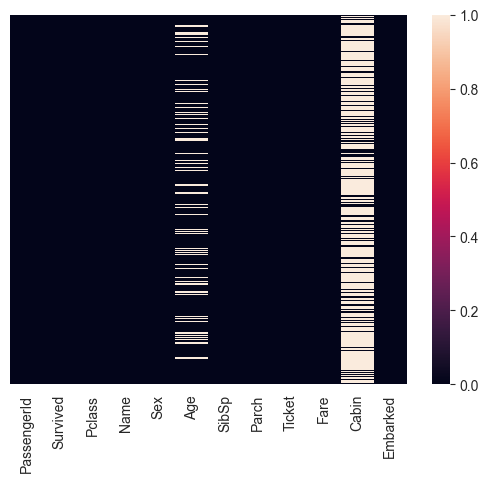

In [172]:
sns.heatmap(train.isnull(),yticklabels=False) # in cabin and age there are many null values

<Axes: xlabel='Survived', ylabel='count'>

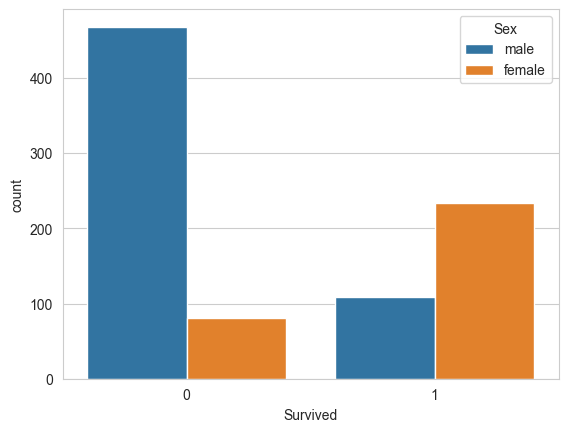

In [173]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=train) #count plot of who survived with gender

<Axes: xlabel='Survived', ylabel='count'>

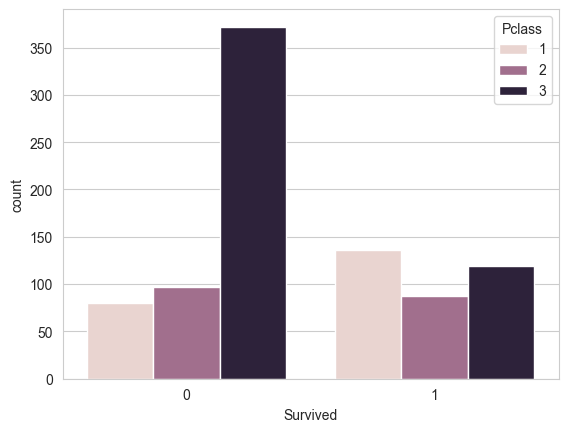

In [174]:
sns.countplot(x='Survived', hue='Pclass',data=train) #pclass = price class (higher number is cheaper ticket)

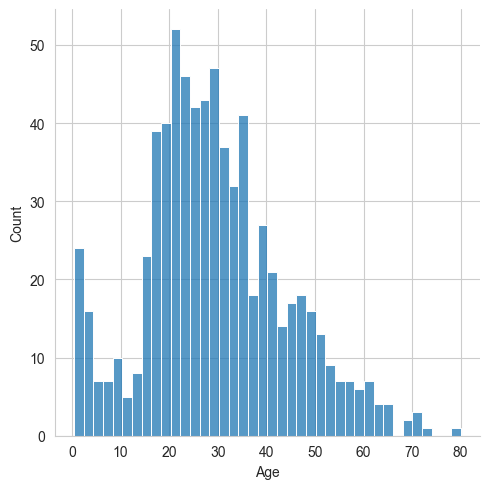

In [175]:
sns.displot(train['Age'].dropna(),kde=False,bins=40) #distribution plot of age

<Axes: xlabel='SibSp', ylabel='count'>

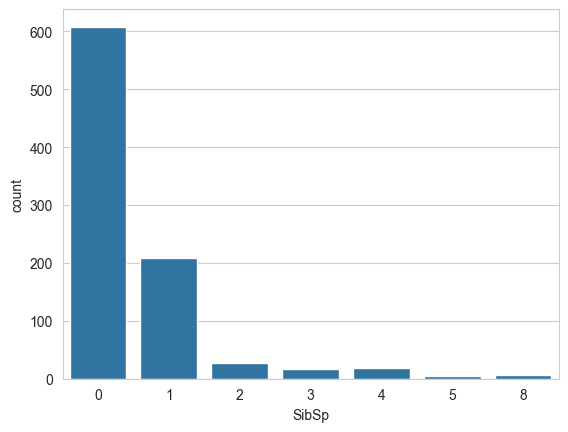

In [176]:
sns.countplot(x='SibSp',data=train) #traveld sibling, spouse or children (absolute number)

<Axes: >

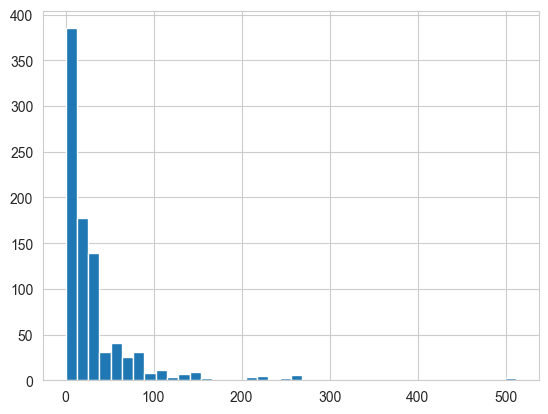

In [177]:
train['Fare'].hist(bins=40) #histogram of fare

<Axes: xlabel='Pclass', ylabel='Fare'>

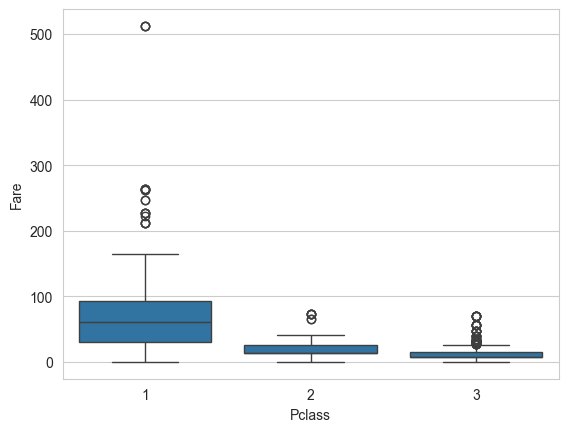

In [178]:
sns.boxplot(x='Pclass', y='Fare', data=train)

# Data clean up - Age

 Row of missing age should not just be deleted

- One could add the mean age (imputation)
- Or adde mean age of different (data-)classes

<Axes: xlabel='Pclass', ylabel='Age'>

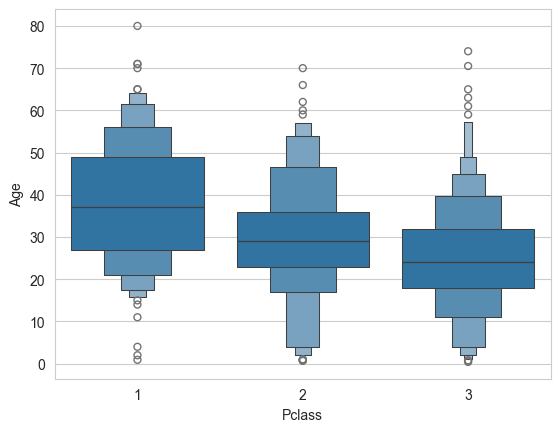

In [179]:
sns.boxenplot(x='Pclass',y='Age',data=train) # 1-3 are price classes
## it can be seen, the more expensive the ticket, the older the passengers

In [180]:
# remove age of "null" by using mean age per class
# the used age vars are hardcoded here, but were extraced by calculating the mean age per class (would normallly be calculated in different function)
def impute_age(cols):
    Age = cols[0] # age per passenger
    Pclass = cols[1] # ticket class
    
    if pd.isnull(Age): 
        if Pclass == 1:
            return 37 
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age  

In [181]:
# use impute_age function on train dataset to fill in missing age values
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/vt/jppww87j5q14fps8m5kbq5yr0000gn/T/ipykernel_76793/546602087.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0] # age per passenger
/var/folders/vt/jppww87j5q14fps8m5kbq5yr0000gn/T/ipykernel_76793/546602087.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1] # ticket class


<Axes: >

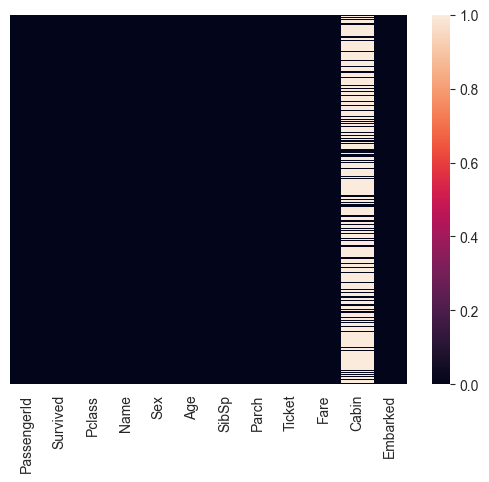

In [182]:
sns.heatmap(train.isnull(),yticklabels=False) #null age was replaced by mean age per class

In [183]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [184]:
train.drop('Cabin',axis=1,inplace=True) #drop cabin column, as it has too many null values
train.dropna(inplace=True) 

<Axes: >

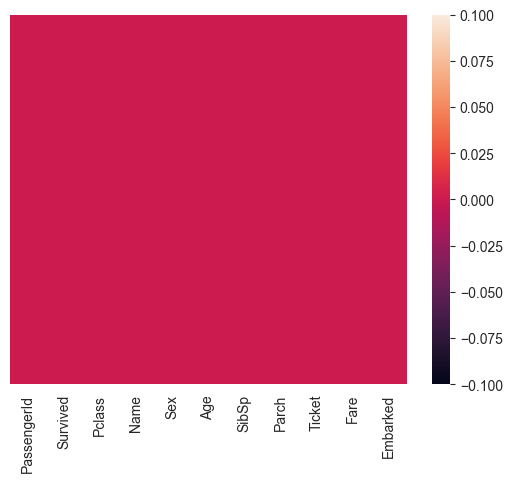

In [185]:
sns.heatmap(train.isnull(),yticklabels=False) #check that cabin was dropped 

In [186]:
train.head() #check for other categorical values
# "Embarked" and "Sex"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [187]:
train.info() #generally object values need to be handled

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [188]:
print(train['Sex'].unique())
print(train['Sex'].value_counts())
dummies = pd.get_dummies(train['Sex'])
print(dummies.head())

['male' 'female']
Sex
male      577
female    312
Name: count, dtype: int64
   female   male
0   False   True
1    True  False
2    True  False
3    True  False
4   False   True


In [189]:
sex =pd.get_dummies(train['Sex'], drop_first=True).head() # get dummies for 'Sex' column, drop first to avoid multicollinearity
"""
This line of code converts the 'Sex' column in the 'train' DataFrame into dummy/indicator variables. 
The `drop_first=True` parameter is used to avoid multicollinearity in the resulting DataFrame by dropping the first category.

Explanation:
When creating dummy variables for a categorical feature, each category is converted into a separate binary column. 
If we keep all the dummy columns, it can lead to multicollinearity issues in some machine learning models, 
as the sum of all dummy variables for a single observation will always be 1. 
By dropping the first column, we avoid this issue because the dropped column can be inferred from the remaining columns.
For example, if the 'Sex' column has categories 'male' and 'female', dropping the 'female' column means that 
if the 'male' column is 0, the observation must be 'female'.
"""

"\nThis line of code converts the 'Sex' column in the 'train' DataFrame into dummy/indicator variables. \nThe `drop_first=True` parameter is used to avoid multicollinearity in the resulting DataFrame by dropping the first category.\n\nExplanation:\nWhen creating dummy variables for a categorical feature, each category is converted into a separate binary column. \nIf we keep all the dummy columns, it can lead to multicollinearity issues in some machine learning models, \nas the sum of all dummy variables for a single observation will always be 1. \nBy dropping the first column, we avoid this issue because the dropped column can be inferred from the remaining columns.\nFor example, if the 'Sex' column has categories 'male' and 'female', dropping the 'female' column means that \nif the 'male' column is 0, the observation must be 'female'.\n"

In [190]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True) #get dummies for embarked column
sex = pd.get_dummies(train['Sex'],drop_first=True) #get dummies for embarked column

In [191]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [192]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [193]:
train = pd.concat([train, sex, embarked], axis=1) # concat the the columns

In [194]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,True,False,False
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,True,True,False


In [195]:
train.drop(['Sex', 'Embarked','Name','Ticket'],axis=1,inplace=True) # Remove Sex, Embarked as it was eliminiated, AND Ticket and Name as they bring no value

In [196]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [197]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,True,False,True
887,888,1,1,19.0,0,0,30.00,False,False,True
888,889,0,3,24.0,1,2,23.45,False,False,True
889,890,1,1,26.0,0,0,30.00,True,False,False
890,891,0,3,32.0,0,0,7.75,True,True,False


# Data Cleaning Finished

In [198]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [199]:
X = train.drop(columns='Survived') 
y = train['Survived']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    random_state=42)

In [201]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
708,709,1,22.0,0,0,151.5500,False,False,True
240,241,3,24.0,1,0,14.4542,False,False,False
382,383,3,32.0,0,0,7.9250,True,False,True
792,793,3,24.0,8,2,69.5500,False,False,True
683,684,3,14.0,5,2,46.9000,True,False,True


In [202]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [203]:
predictions = log_model.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

# Evaluate Trained Model

In [204]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.78      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [205]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[88, 21],
       [15, 54]])